# Wichtige Pakete importieren

In [1]:
import numpy as np # Python-Bibliothek um mit effizient mit Arrays zu arbeiten
import pandas as pd # Bibliothek um mit tabellarischen Daten zu arbeiten

import matplotlib.pyplot as plt # Bibliothek zum Zeichnen

#NEU
import torch

# Spielzeug-Daten laden und visualisieren

In [3]:
# Daten als pandas Dataframe laden
data = pd.read_csv("toydata.txt", sep="\t")
data

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [8]:
# Spalte Daten in Punkte und labels
X = torch.from_numpy(data[["x1", "x2"]].values).to(dtype=torch.float32)
y = torch.from_numpy(data["label"].values).to(dtype=torch.float32)

# Dimensionen prüfen
print(f"Dimensionen von X: {X.shape}", f"Dimensionen von y: {y.shape}", sep="\n")
print(f"Datatype: {X.dtype}, {y.dtype}")

Dimensionen von X: torch.Size([20, 2])
Dimensionen von y: torch.Size([20])
Datatype: torch.float32, torch.float32


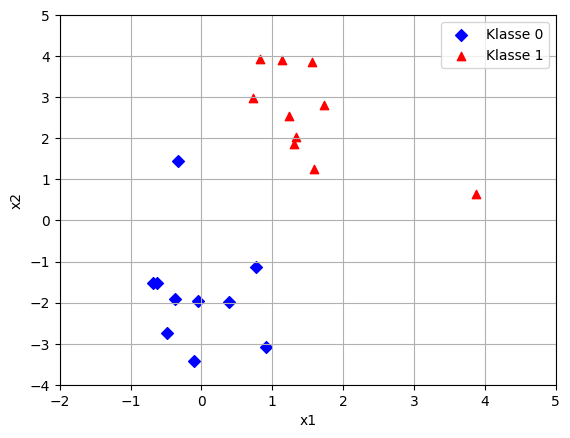

In [9]:
# zeichne Punkte mit label 0
plt.scatter(data[data["label"]==0].loc[:, "x1"], data[data["label"]==0].loc[:,"x2"],
            marker="D",
            c="blue",
            label="Klasse 0")

# zeichne Punkte mit label 1
plt.scatter(data[data["label"]==1].loc[:, "x1"], data[data["label"]==1].loc[:,"x2"],
            marker="^",
            c="red",
            label="Klasse 1"
            )

plt.xlim((-2,5))
plt.ylim((-4,5))
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend();


# Perceptron implementieren zur Klassifizierung der Punkte in Klasse 0 und 1

In [10]:
class Perceptron:
    # Contructor der Perceptron Klasse
    def __init__(self, num_features):
        self.num_features = 2
        # initialisiere bias und weights als torch tensors
        self.bias = torch.tensor(0.0, dtype=torch.float32)
        self.wheights = torch.zeros(num_features, dtype=torch.float32)

    # Berechnung des Schwellenwertes
    def forward(self, x):
        wheighted_sum_z = x@self.wheights + self.bias

        prediction = torch.where(wheighted_sum_z>0,1.,0.)

        return prediction

    def update(self, x, y_true):
        y_pred = self.forward(x)
        error = y_true - y_pred

        self.bias += error
        self.wheights += x*error
        return error


In [11]:
# Checken, ob alles läuft
perc = Perceptron(2)
print(f"Gewichte nach der Initialisierung: {perc.wheights}")
perc.update(X[11], 1)
print(f"Gewichte nach dem update: {perc.wheights}")

Gewichte nach der Initialisierung: tensor([0., 0.])
Gewichte nach dem update: tensor([0.7300, 2.9700])


# Trainiere das Perceptron

In [12]:
def train(model, Xs, ys, epochs = 5):
    for epoch in range(epochs):
        error_count = 0
        for x,y in zip(Xs, ys):
            error = model.update(x,y)
            error_count += abs(error)
        print(f"Falsch klassifizierte Punkte nach {epoch+1} Epochen: {error_count}")

In [13]:
perceptron = Perceptron(num_features=2)
train(perceptron, X, y)

Falsch klassifizierte Punkte nach 1 Epochen: 1.0
Falsch klassifizierte Punkte nach 2 Epochen: 3.0
Falsch klassifizierte Punkte nach 3 Epochen: 1.0
Falsch klassifizierte Punkte nach 4 Epochen: 0.0
Falsch klassifizierte Punkte nach 5 Epochen: 0.0


# Visualisiere die Entscheidungsgrenze

In [14]:
perceptron.wheights

tensor([2.8600, 1.9800])

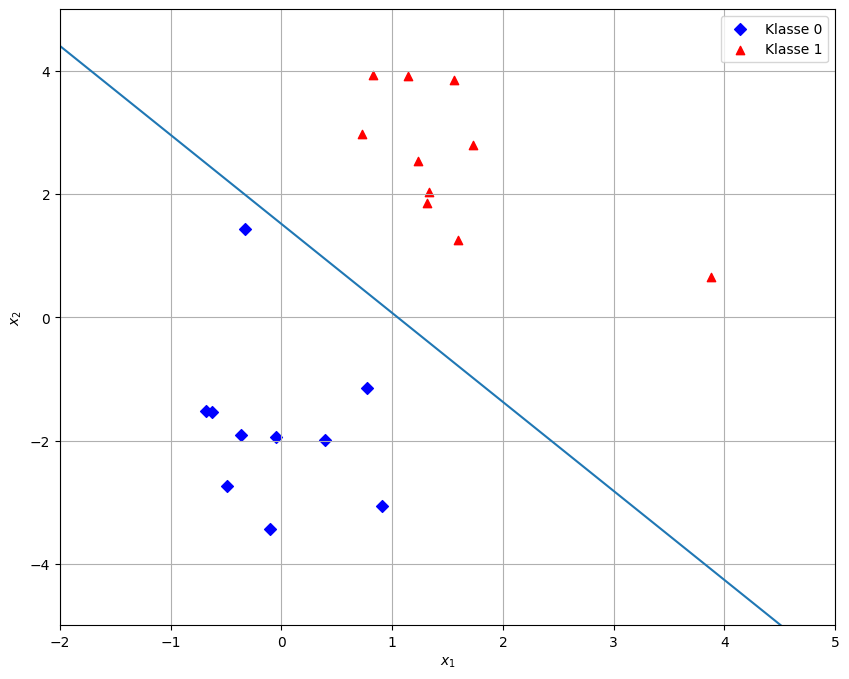

In [15]:
def plot_decision_boundaries(model, data, x_min, x_max, ax):
    # zeichne Punkte mit label 0

    ax.scatter(data[data["label"]==0].loc[:, "x1"], data[data["label"]==0].loc[:,"x2"],
                marker="D",
                c="blue",
                label="Klasse 0")

    # zeichne Punkte mit label 1
    ax.scatter(data[data["label"]==1].loc[:, "x1"], data[data["label"]==1].loc[:,"x2"],
                marker="^",
                c="red",
                label="Klasse 1"
                )

    w1 = model.wheights[0]
    w2 = model.wheights[1]
    b = model.bias
    if w2:
        ax.plot([x_min, x_max], [(-w1*x_min-b)/w2, (-w1*x_max-b)/w2])
    else:
        ax.plot([x_min, x_max], [0, 0])

    ax.set_xlim((x_min,x_max))
    ax.set_ylim((-5,5))
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.grid()
    ax.legend()

_, ax = plt.subplots(figsize=(10,8))
plot_decision_boundaries(perceptron, data, -2, 5, ax)

In [3]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class Neuron:
    # Don't change anything in the `__init__` function.
    def __init__(self, examples):
        np.random.seed(42)
        # Three weights: one for each feature and one more for the bias.
        self.weights = np.random.normal(0, 1, 3 + 1)
        self.examples = examples
        #self.train()

    def forward(self):
        x = self.examples["features"]
        weighted_sum = np.array(x)@np.array(self.weights[:-1]) + np.array(self.weights[-1])
        return sigmoid(weighted_sum)

neuron = Neuron({"features": [0.79, 0.89, 0.777], "label": 0})

neuron.forward()

0.9085147032218469